In [294]:
import tabula
import pandas as pd

# Define the path to your PDF
pdf_path = '../data/ArrestDataPDFs/Arrest_Court_Data(17-18).pdf'
year = '2017'

In [295]:
import pdfplumber

#should read a page and then return a df containing the table of that page 
def page_df(page):
    table = page.extract_tables()
    # display(page.to_image().debug_tablefinder())
    columns = table[0][0]
    rows = table[0][1:]
    df = pd.DataFrame(rows, columns=columns)
    return df

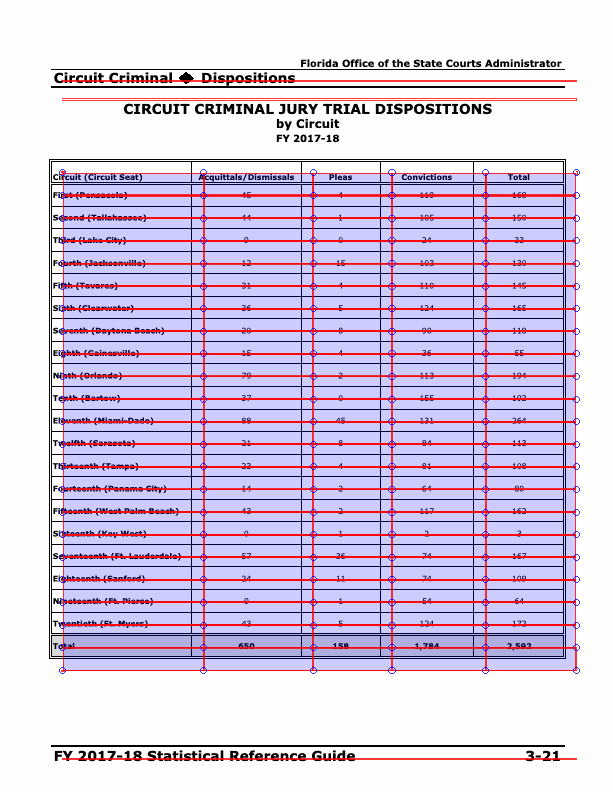

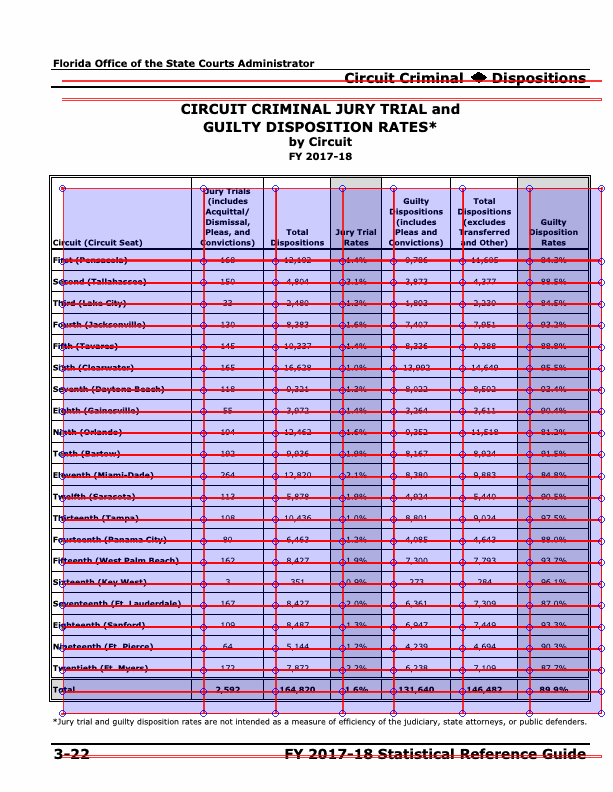

In [296]:
with pdfplumber.open(pdf_path) as pdf:
    #extract acquittals df 
    page = pdf.pages[20]
    display(page.to_image().debug_tablefinder())
    acquittals_df = page_df(page)
    # acquittals_df.to_excel(f'./Acquittals(13).xlsx', index=False)

    #extract jury df
    page = pdf.pages[21]
    display(page.to_image().debug_tablefinder())
    jury_df = page_df(page)
    # jury_df.to_excel(f'./Jury(13).xlsx', index=False)

    #extract charges df    
    
    dfs = []  # List to store all DataFrames

    # Loop over the pages you want to process
    for i in range(8, 12):  # Replace with actual page numbers
        page = pdf.pages[i]
        df = page_df(page)
        dfs.append(df)

    # Concatenate all DataFrames into one
    charges_df = pd.concat(dfs, ignore_index=True)
    charges_df = charges_df[charges_df['Circuit/County'].str.contains('Circuit', case=False, na=False)]

    charges_df = charges_df.drop(columns=charges_df.columns[-1])
    # df.to_excel('./Filings(13).xlsx')

In [297]:
acquittals_df

,Circuit (Circuit Seat),Acquittals/Dismissals,Pleas,Convictions,Total
0,First (Pensacola),45,4,119,168
1,Second (Tallahassee),44,1,105,150
2,Third (Lake City),9,0,24,33
3,Fourth (Jacksonville),12,15,103,130
4,Fifth (Tavares),31,4,110,145
5,Sixth (Clearwater),36,5,124,165
6,Seventh (Daytona Beach),20,8,90,118
7,Eighth (Gainesville),15,4,36,55
8,Ninth (Orlando),79,2,113,194
9,Tenth (Bartow),37,0,155,192


In [298]:
jury_df

,Circuit (Circuit Seat),"Jury Trials\n(includes\nAcquittal/\nDismissal,\nPleas, and\nConvictions)",Total\nDispositions,Jury Trial\nRates,Guilty\nDispositions\n(includes\nPleas and\nConvictions),Total\nDispositions\n(excludes\nTransferred\nand Other),Guilty\nDisposition\nRates
0,First (Pensacola),168,"12,192",1.4%,"9,786","11,605",84.3%
1,Second (Tallahassee),150,"4,804",3.1%,"3,873","4,377",88.5%
2,Third (Lake City),33,"2,480",1.3%,"1,893","2,239",84.5%
3,Fourth (Jacksonville),130,"8,383",1.6%,"7,407","7,951",93.2%
4,Fifth (Tavares),145,"10,337",1.4%,"8,336","9,388",88.8%
5,Sixth (Clearwater),165,"16,628",1.0%,"13,992","14,649",95.5%
6,Seventh (Daytona Beach),118,"9,321",1.3%,"8,022","8,592",93.4%
7,Eighth (Gainesville),55,"3,972",1.4%,"3,264","3,611",90.4%
8,Ninth (Orlando),194,"12,462",1.6%,"9,352","11,518",81.2%
9,Tenth (Bartow),192,"9,936",1.9%,"8,167","8,924",91.5%


In [299]:
charges_df

,Circuit/County,Total Filings (Defendants),Total Charges (Counts)
0,Circuit 1,"12,344","27,357"
5,Circuit 2,"4,887","11,329"
12,Circuit 3,"2,503","5,771"
20,Circuit 4,"8,370","18,605"
24,Circuit 5,"10,629","22,623"
30,Circuit 6,"17,684","30,754"
33,Circuit 7,"9,346","19,400"
38,Circuit 8,"4,022","8,451"
45,Circuit 9,"14,012","29,440"
48,Circuit 10,"10,225","30,394"


In [300]:
# limiting rows to 20
acquittals_df = acquittals_df.iloc[:20]
jury_df = jury_df.iloc[:20]
charges_df = charges_df.iloc[:20]

#renaming first column to circuitID
acquittals_df = acquittals_df.rename(columns={acquittals_df.columns[0]: 'circuitID'})
jury_df = jury_df.rename(columns={jury_df.columns[0]: 'circuitID'})
charges_df = charges_df.rename(columns={charges_df.columns[0]: 'circuitID'})

#setting the values of the first column to 1 - 20
values = list(range(1, 21))  # Create a list of values from 1 to 20

acquittals_df.iloc[:, 0] = values
jury_df.iloc[:, 0] = values
charges_df.iloc[:, 0] = values

In [301]:
# Reset the index of each DataFrame
acquittals_df = acquittals_df.reset_index(drop=True)
jury_df = jury_df.reset_index(drop=True)
charges_df = charges_df.reset_index(drop=True)

# Select only the 'JuryTrial\nRates' column from jury_df
jury_rate_df = jury_df[['circuitID', 'Jury Trial\nRates']]

# Concatenate the DataFrames
combined_df = pd.concat([acquittals_df, jury_rate_df, charges_df], axis=1)
combined_df = combined_df.drop(columns='Total')
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

In [302]:
# add year and reorder columns
combined_df.insert(1, 'Year', year)

In [303]:
# Reorder the columns
columns_order = ['circuitID', 'Year', 'Total Filings (Defendants)', 'Total Charges (Counts)'] + [col for col in combined_df.columns if col not in ['circuitID', 'Year', 'Total Filings (Defendants)', 'Total Charges (Counts)']]
combined_df = combined_df[columns_order]

In [304]:
combined_df

,circuitID,Year,Total Filings (Defendants),Total Charges (Counts),Acquittals/Dismissals,Pleas,Convictions,Jury Trial\nRates
0,1,2017,"12,344","27,357",45,4,119,1.4%
1,2,2017,"4,887","11,329",44,1,105,3.1%
2,3,2017,"2,503","5,771",9,0,24,1.3%
3,4,2017,"8,370","18,605",12,15,103,1.6%
4,5,2017,"10,629","22,623",31,4,110,1.4%
5,6,2017,"17,684","30,754",36,5,124,1.0%
6,7,2017,"9,346","19,400",20,8,90,1.3%
7,8,2017,"4,022","8,451",15,4,36,1.4%
8,9,2017,"14,012","29,440",79,2,113,1.6%
9,10,2017,"10,225","30,394",37,0,155,1.9%


	circuitID INT NOT NULL,
	Year INT NOT NULL,
	Filings INT,
	Charges INT NOT NULL,
	Acquittals INT NOT NULL,
	Pleas INT NOT NULL,
	Convictions INT NOT NULL,
	juryTrialRates FLOAT NOT NULL,

## Processing Combined Table

In [11]:
import pandas as pd
df = pd.read_csv('../data/CircuitJudicialData/2005_Judicial.csv')
df
# df = combined_df

,circuitID,year,filings,charges,acquittals,pleas,convictions,juryTrialRates
0,1,2005,11034,22893,68,8,126,0.020
1,2,2005,5796,12621,69,1,99,0.030
2,3,2005,2124,4682,5,5,43,0.028
3,4,2005,11560,26193,18,46,57,0.010
4,5,2005,11768,24348,74,24,94,0.017
...,...,...,...,...,...,...,...,...
115,16,2010,1421,3065,1,8,7,0.017
116,17,2010,16216,33801,137,1,194,0.022
117,18,2010,8987,18536,43,50,189,0.034
118,19,2010,5855,13560,27,5,67,0.019


In [12]:
column_names = ['circuitID',	'year',	'filings',	'charges', 'acquittals', 'pleas', 'convictions', 'juryTrialRates']
df.columns = column_names
df

,circuitID,year,filings,charges,acquittals,pleas,convictions,juryTrialRates
0,1,2005,11034,22893,68,8,126,0.020
1,2,2005,5796,12621,69,1,99,0.030
2,3,2005,2124,4682,5,5,43,0.028
3,4,2005,11560,26193,18,46,57,0.010
4,5,2005,11768,24348,74,24,94,0.017
...,...,...,...,...,...,...,...,...
115,16,2010,1421,3065,1,8,7,0.017
116,17,2010,16216,33801,137,1,194,0.022
117,18,2010,8987,18536,43,50,189,0.034
118,19,2010,5855,13560,27,5,67,0.019


In [307]:
# import numpy as np
# # Find the index of the 'year' column
# idx = df.columns.get_loc('Year')

# # Insert new columns after 'year'
# df.insert(idx + 1, 'Filings', np.nan)
# df.insert(idx + 2, 'Charges', np.nan)
# df

In [5]:
# df['juryTrialRates'] = df['juryTrialRates']/100.0

In [7]:
df = df.sort_values(by='year')
df

,circuitID,year,filings,charges,acquittals,pleas,convictions,juryTrialRates
119,20,2017,8354,17797,43,5,124,0.877
100,1,2017,12344,27357,45,4,119,0.843
101,2,2017,4887,11329,44,1,105,0.885
102,3,2017,2503,5771,9,0,24,0.845
103,4,2017,8370,18605,12,15,103,0.932
...,...,...,...,...,...,...,...,...
17,18,2022,7511,15884,13,4,24,0.908
18,19,2022,5230,12914,30,3,82,0.867
19,20,2022,7637,17799,33,1,102,0.843
10,11,2022,12726,24823,68,24,129,0.885


In [13]:
year = 2005
df.to_csv(f'../Data/CircuitJudicialData/{year}_Judicial.csv', index=False)

## Forecasting Code

In [4]:
#create big dataframe
import pandas as pd
import glob
import os

# Set the directory where the CSV files are located
csv_dir = "../data/CircuitJudicialData"

# Get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_dir, "*.csv"))

# Create an empty list to store the DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Combine all the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df = combined_df.dropna()
data = combined_df

In [5]:
data

,circuitID,year,filings,charges,acquittals,pleas,convictions,juryTrialRates
20,1,2012,"11,591","23,389",53,12.0,135,0.018
21,2,2012,"4,819","10,760",54,4.0,136,0.040
22,3,2012,"2,519","5,643",2,0.0,15,0.008
23,4,2012,"11,072","21,382",31,16.0,201,0.022
24,5,2012,"10,297","22,317",41,2.0,67,0.010
...,...,...,...,...,...,...,...,...
455,18,2022,7511,15884,13,4.0,24,0.908
456,19,2022,5230,12914,30,3.0,82,0.867
457,20,2022,7637,17799,33,1.0,102,0.843
458,11,2022,12726,24823,68,24.0,129,0.885


In [ ]:
def get_history(data):
    #pass in a set of data and it returns a forecast 
    #input data and I want to forecast 30 data points before 

In [8]:
def process_group(df):
    # This is where you would put your processing code.
    # For now, let's just print the group.
    #pass in data by column and put its output into a column
    print(df)
    return df

In [10]:
# Filter data by circuitID, and call a function on each df that contains the circuit as well as the other columns 
grouped = data.groupby('circuitID')
processed = grouped.apply(process_group)
processed

/var/folders/bl/kzfk5ts90gj98y9jcv49ynmc0000gn/T/ipykernel_31244/673572346.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  processed = grouped.apply(process_group)


circuitID  year filings charges  acquittals  pleas  \
circuitID                                                           
1         20           1  2012  11,591  23,389          53   12.0   
          40           1  2015  10,623  23,103          33   15.0   
          60           1  2014  10,535  22,154          39   13.0   
          80           1  2013  11,362  23,261          35    8.0   
          100          1  2001   9,111  18,634          64    4.0   
...                  ...   ...     ...     ...         ...    ...   
20        374         20  2018    8629   18746          38   37.0   
          397         20  2019    7278   16298          36   38.0   
          400         20  2020    6944   16154          12    6.0   
          438         20  2021    7081   15874          26    1.0   
          457         20  2022    7637   17799          33    1.0   

               convictions  juryTrialRates  
circuitID                                   
1         20           135           0.018  
          40           114           0.017  
          60           111           0.016  
          80            96           0.012  
          100          102           0.021  
...                    ...             ...  
20        374          104           0.862  
          397           91           0.835  
          400           18           0.841  
          438           95           0.834  
          457          102           0.843  

[439 rows x 8 columns]